In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
%matplotlib inline


In [2]:
df = pd.read_excel("Topics_stars10000_project_keyword.xlsx")
df

,project_name,topic_keyword
0,freeCodeCamp/freeCodeCamp,"['react', 'nodejs', 'javascript', 'd3', 'teach..."
1,996icu/996.ICU,[]
2,EbookFoundation/free-programming-books,"['education', 'list', 'books', 'resource', 'ha..."
3,jwasham/coding-interview-university,"['computer-science', 'algorithm', 'algorithms'..."
4,vuejs/vue,"['javascript', 'framework', 'vue', 'frontend']"
...,...,...
995,visionmedia/superagent,[]
996,charlax/professional-programming,"['programming-language', 'learning', 'computer..."
997,oracle/graal,"['javascript', 'ruby', 'python', 'c', 'java', ..."
998,dvajs/dva,"['redux', 'framework', 'redux-saga', 'elm', 'd..."


In [3]:
result = []
topic_dic = {}
for idx,j in enumerate(df['topic_keyword']):
    i_list = j.replace("[","").replace("]","").replace("'","").split(",")
    i_list = [i.strip() for i in i_list]
    df['topic_keyword'][idx] = i_list
    for i in i_list:
        i=i.strip()
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
# 218번 index 까지 5번 나오는 topic 임
# 몇번까지 나오는것을 feature로 사용할 것인지?
num_of_word = 5
end_index = 0
for idx,item in enumerate(topic_dic):
    if item[1] < num_of_word:
        end_index = idx - 1
        break
topic_list = [i[0] for i in topic_dic[0:end_index]]
topic_dic

[('javascript', 153),
 ('python', 85),
 ('hacktoberfest', 79),
 ('react', 67),
 ('go', 49),
 ('nodejs', 48),
 ('java', 44),
 ('awesome', 43),
 ('android', 41),
 ('machine-learning', 39),
 ('awesome-list', 35),
 ('css', 34),
 ('vue', 33),
 ('deep-learning', 33),
 ('typescript', 33),
 ('framework', 29),
 ('macos', 27),
 ('golang', 26),
 ('html', 25),
 ('ios', 25),
 ('windows', 24),
 ('terminal', 23),
 ('linux', 22),
 ('cli', 22),
 ('list', 21),
 ('web', 21),
 ('docker', 21),
 ('electron', 20),
 ('database', 20),
 ('api', 18),
 ('shell', 18),
 ('swift', 17),
 ('react-native', 17),
 ('interview', 16),
 ('ui', 16),
 ('interview-questions', 16),
 ('kubernetes', 16),
 ('computer-science', 15),
 ('algorithm', 15),
 ('tensorflow', 15),
 ('material-design', 15),
 ('c', 15),
 ('graphql', 15),
 ('security', 15),
 ('mysql', 14),
 ('node', 14),
 ('rust', 14),
 ('algorithms', 13),
 ('es6', 13),
 ('command-line', 13),
 ('compiler', 13),
 ('webpack', 13),
 ('php', 13),
 ('json', 13),
 ('ruby', 13),
 ('

In [4]:
df_vector = pd.DataFrame(topic_list).transpose()
df_vector

,0,1,2,3,4,5,6,7,8,9,...,202,203,204,205,206,207,208,209,210,211
0,javascript,python,hacktoberfest,react,go,nodejs,java,awesome,android,machine-learning,...,vpn,websocket,jupyter-notebook,bittorrent,cache,cheatsheet,dropbox,hooks,linter,keras


In [5]:
topic_dic_df = {}
for i in topic_list:
    topic_dic_df[i]=0
topic_list

['javascript',
 'python',
 'hacktoberfest',
 'react',
 'go',
 'nodejs',
 'java',
 'awesome',
 'android',
 'machine-learning',
 'awesome-list',
 'css',
 'vue',
 'deep-learning',
 'typescript',
 'framework',
 'macos',
 'golang',
 'html',
 'ios',
 'windows',
 'terminal',
 'linux',
 'cli',
 'list',
 'web',
 'docker',
 'electron',
 'database',
 'api',
 'shell',
 'swift',
 'react-native',
 'interview',
 'ui',
 'interview-questions',
 'kubernetes',
 'computer-science',
 'algorithm',
 'tensorflow',
 'material-design',
 'c',
 'graphql',
 'security',
 'mysql',
 'node',
 'rust',
 'algorithms',
 'es6',
 'command-line',
 'compiler',
 'webpack',
 'php',
 'json',
 'ruby',
 'programming',
 'bash',
 'dashboard',
 'devops',
 'monitoring',
 'git',
 'editor',
 'spring',
 'c-plus-plus',
 'angular',
 'animation',
 'microservices',
 'spring-boot',
 'redux',
 'data-science',
 'vim',
 'frontend',
 'mobile',
 'svg',
 'documentation',
 'testing',
 'rest',
 'tutorial',
 'http',
 'cross-platform',
 'wechat',
 'pos

In [6]:
df_vector = pd.DataFrame(result,index=df['project_name'],columns=topic_list).fillna(0)
df_vector

,javascript,python,hacktoberfest,react,go,nodejs,java,awesome,android,machine-learning,...,vpn,websocket,jupyter-notebook,bittorrent,cache,cheatsheet,dropbox,hooks,linter,keras
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996icu/996.ICU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EbookFoundation/free-programming-books,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jwasham/coding-interview-university,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vuejs/vue,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visionmedia/superagent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
charlax/professional-programming,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
oracle/graal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
for idx,topics in enumerate(df['topic_keyword']):
    for topic in topics:
        if topic in topic_list:
            df_vector.loc[df['project_name'][idx],topic] = 1
df_vector

,javascript,python,hacktoberfest,react,go,nodejs,java,awesome,android,machine-learning,...,vpn,websocket,jupyter-notebook,bittorrent,cache,cheatsheet,dropbox,hooks,linter,keras
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996icu/996.ICU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EbookFoundation/free-programming-books,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jwasham/coding-interview-university,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vuejs/vue,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visionmedia/superagent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
charlax/professional-programming,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
oracle/graal,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_vector.to_excel("packages_vectors.xlsx",index=False)

In [9]:
df_vector.shape

(1000, 212)

In [10]:
pca = PCA(n_components=2,random_state=11)
pca

PCA(n_components=2, random_state=11)

In [11]:
df_pca = pca.fit_transform(df_vector[0:50])
print(df_pca.shape)

(50, 2)


In [12]:
df_pca

array([[-1.02160772,  0.88347041],
       [ 0.10752816, -0.38501549],
       [ 0.079947  , -0.26266387],
       [ 1.64918006,  0.97327034],
       [-0.56318912,  0.307214  ],
       [-0.67922192,  0.30913822],
       [ 0.42699017, -0.16483113],
       [ 0.13103074, -0.53499279],
       [ 0.35287285, -0.34240373],
       [-0.63912141,  0.25379992],
       [ 0.14242894, -0.51392325],
       [-0.88893715,  0.93132025],
       [ 0.82463258,  0.67285528],
       [ 1.53766548,  0.7931334 ],
       [ 0.20179305, -0.54594352],
       [-0.21012762, -0.69457582],
       [ 0.1132782 , -0.41229274],
       [-0.03527577, -0.44859735],
       [ 1.15431406,  1.49842909],
       [ 0.10752816, -0.38501549],
       [-0.1070679 , -0.03456293],
       [ 0.83101211,  0.53944794],
       [-0.64002191,  0.39356722],
       [ 1.13354493,  0.3673372 ],
       [ 0.10752816, -0.38501549],
       [ 0.26553081, -0.25901481],
       [ 0.10752816, -0.38501549],
       [ 0.09984244, -0.46912041],
       [ 0.10752816,

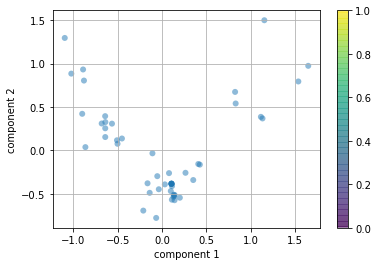

In [13]:
plt.scatter(df_pca[:,0], df_pca[:,1],
            edgecolor='none', alpha=0.5, cmap='tab10')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.grid()
plt.show()

In [14]:
# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 9프로 정도 보존이되는거임 
pca.explained_variance_ratio_

array([0.10040992, 0.0770382 ])

In [15]:
# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(df_vector)

In [16]:
# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
pca.n_components_

153

In [25]:
# Instantiate the clustering model 
# n_init : 랜덤한 초기값을 몇번이나 다르게 설정해서 돌릴건지
# max_iter=300 : iteration을 반복적으로 수행하면 서 좋을 결과로 수렴하게되는데 그 횟수를 몇번 할 것인지
# verbose : 계산과정 보여줌 0,1,2 이렇게 해서 보여주는 정보의 양을 조절 할 수있음
kmeans = KMeans(n_clusters=5)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

KMeans(n_clusters=5)

In [26]:
# 모델에 fitting 하기
kmeans.fit(df_pca)

KMeans(n_clusters=5)

In [27]:
y_kmeans = kmeans.predict(df_pca)
y_kmeans

array([3, 1, 1, 4, 0, 0, 1, 1, 1, 0, 1, 3, 2, 4, 1, 1, 1, 1, 4, 1, 1, 2,
       0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 3, 3, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1], dtype=int32)

In [28]:
kmeans.cluster_centers_

array([[-0.6380347 ,  0.22968357],
       [ 0.09490997, -0.41676111],
       [ 0.97618664,  0.49129697],
       [-0.97125092,  0.97819275],
       [ 1.4470532 ,  1.08827761]])

In [29]:
kmeans.labels_[0:8]

array([3, 1, 1, 4, 0, 0, 1, 1], dtype=int32)

In [30]:
y_kmeans[:5]

array([3, 1, 1, 4, 0], dtype=int32)

In [31]:
# 클러스터링의 성능측정
kmeans.inertia_

2.428571021900039

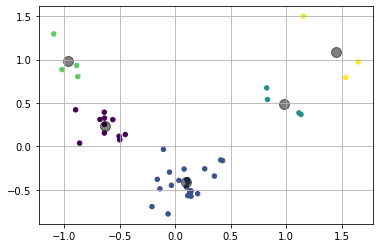

In [32]:
plt.scatter(df_pca[:,0], df_pca[:,1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()